Start Time: January 23, 2024
End Time: 

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import linear_model
import matplotlib.pyplot as plt
import random

# 1. Two-dimention data

## 1.1 Create data and visualization

the intercept is -0.5986275849892874 and the coefficient is 0.53376686590539


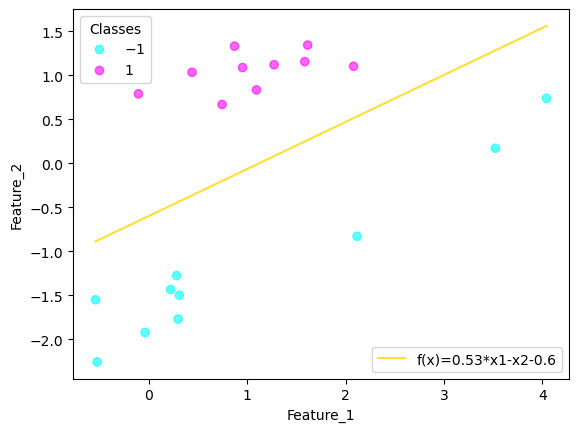

In [110]:
# two-dimention data
td_data = make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=24)
td_data = list(td_data)
td_data[1] = np.array([-1 if i == 1 else 1 for i in td_data[1]])
td_data = tuple(td_data)

# visualized data
fig, ax = plt.subplots()
scatter = ax.scatter(td_data[0][:, 0], td_data[0][:, 1], c=td_data[1], alpha=0.6, cmap="cool")
legend_1 = ax.legend(*scatter.legend_elements(), title="Classes", loc="upper left")
ax.add_artist(legend_1)
ax.set_xlabel("Feature_1")
ax.set_ylabel("Feature_2")

# add minimal residual sum of squares line as gold standard
reg = linear_model.LinearRegression()

# reshape for model fitting
reg.fit(td_data[0][:, 0].reshape(-1, 1), td_data[0][:, 1].reshape(-1, 1))
print(f"the intercept is {reg.intercept_[0]} and the coefficient is {reg.coef_[0][0]}")
formula = f"f(x)={round(reg.coef_[0][0], 2)}*x1-x2{round(reg.intercept_[0], 2)}"

# create a x axis for plotting
create_x_axis = np.linspace(min(td_data[0][:, 0]), max(td_data[0][:, 0]), 100).reshape(-1, 1)
predicted_value = reg.predict(create_x_axis)

ax.plot(create_x_axis, predicted_value, c="gold", alpha=0.8, label=formula)
handles, labels = ax.get_legend_handles_labels()
legend_2 = ax.legend(handles, labels, loc="lower right")

plt.show()

## 1.2 manually fit data

The loss function 
$$
\min\mathbf{L}\mathcal{(\omega, b)} = -\sum_{x_{i}} \mathcal{y_{i}(\omega\cdot x_{i} + b)}
$$

In [235]:
# initiate weight, intercept and learning rate
weight = 0
intercept = 0
learn_rate = 0.5

# take the partial derivative of w and b
def partial_derivative_w(data_point):
    # feature_1 * feature_2
    result = data_point[0] * data_point[1]
    return result

def partial_derivative_b(data_point):
    # label
    result = data_point
    return result

# decision function. w and b will be change if exist data point make 
def decision_funtion(weight, intercept):
    # store raw index of all positive and negative sample for finding wrongly classified data point
    raw_positive_index = [np.where(td_data[1] == 1)][0][0]
    raw_negative_index = [np.where(td_data[1] == -1)][0][0]

    positive_result = td_data[0][np.where(td_data[1] == 1)][:, 0] * td_data[0][np.where(td_data[1] == 1)][:, 1] * weight + intercept
    negative_result = -1 * (td_data[0][np.where(td_data[1] == -1)][:, 0] * td_data[0][np.where(td_data[1] == -1)][:, 1] * weight + intercept)

    if len(positive_result[positive_result < 0]) == 0 and len(negative_result[negative_result < 0]) == 0:
        print(f"iteration end. the weight is {weight} and the intercept is {intercept}")
        return [False, None, None]
    else:
        if len(positive_result[positive_result < 0]) == 0:
            wrong_dp = td_data[0][raw_negative_index[np.where(negative_result < 0)[0][0]]]
            return [True, wrong_dp, -1]
        elif len(negative_result[negative_result < 0]) == 0 :
            wrong_dp = td_data[0][raw_positive_index[np.where(positive_result < 0)[0][0]]]
            return [True, wrong_dp, 1]
        else:
            wrong_dp = td_data[0][raw_positive_index[np.where(positive_result < 0)[0][0]]]
            return [True, wrong_dp, 1]

def plot_function(weight, intercept):
    fig, ax = plt.subplots()
    scatter = ax.scatter(td_data[0][:, 0], td_data[0][:, 1], c=td_data[1], alpha=0.6)
    ax.legend(*scatter.legend_elements(), title="Classes")
    ax.set_xlabel("Feature_1")
    ax.set_ylabel("Feature_2")
    hyperplane = [weight * i + intercept for i in create_x_axis]
    ax.plot(create_x_axis, hyperplane, c='green', alpha=0.5)
    plt.show()


# iteration times
iteration_times = 5

# random value in two dimention data
random_index = random.randint(0, 19)
feature_point = td_data[0][random_index]
label_point = td_data[1][random_index]
# it is not correctly classified for any data point resulting in loss function equte 0.
for iteration in range(iteration_times):
    
    new_weight = weight + (learn_rate * partial_derivative_w(feature_point))
    new_intercept = intercept + (learn_rate * partial_derivative_b(label_point))
    
    # decision
    decision_condition, wrong_dp, wrong_lp = decision_funtion(new_weight, new_intercept)
    
    if decision_condition:
        weight = new_weight
        intercept = new_intercept
        # wrong data point
        feature_point = wrong_dp
        label_point = wrong_lp
        print(f"The {iteration + 1} iteration\tweight={weight}\tintercept={intercept}\n")
        # plot_function(weight, intercept)
    else:
        print(f"The {iteration + 1} iteration\tweight={weight}\tintercept={intercept}\n and finish")
        # plot_function(weight, intercept)
        break
    # print(f"The {iteration + 1} iteration\tweight={weight}\tintercept={intercept}\n")

# while decision_funtion(weight, intercept):
    

The 1 iteration	weight=-0.2320219134386893	intercept=-0.5

The 2 iteration	weight=0.9138116010289036	intercept=0.0

The 3 iteration	weight=0.8718351932554319	intercept=0.5

The 4 iteration	weight=0.9095949784863967	intercept=0.0

The 5 iteration	weight=0.867618570712925	intercept=0.5



In [223]:
a = td_data[0][np.where(td_data[1] == 1)][:, 0] * td_data[0][np.where(td_data[1] == 1)][:, 1] * weight + intercept
len(a[a < 0])

1

In [226]:
b = td_data[0][np.where(td_data[1] == -1)][:, 0] * td_data[0][np.where(td_data[1] == -1)][:, 1] * weight + intercept
b

array([  252.4120057 , -1266.72436033, -6138.72735938, -1629.58329465,
       -1843.50056933, -1112.29359207,  2079.46666337,  4136.82224622,
        2923.04311175, 10380.29910972])

In [229]:
np.where(b < 0)[0][0]

1